# Machine Lenarning Random Forest(Floresta Aleatória)

Bibliotecas

In [4]:
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carregando a base de dados

In [5]:
df_edu = pd.read_csv(r"C:\Users\marcf\OneDrive\Documentos\Ciencia de dados\Árvores de decisão e Florestas Aleatórias\random-forest-materiais-apoio\xAPI-Edu-Data.csv")

In [6]:
df_edu.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


Distribuição de classes

In [7]:
df_edu['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

Verificando os registros nulos

In [8]:
df_edu.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

Codificando os atributos numéricos

In [9]:
Features = df_edu
Cat_Columns = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Columns:
    label = LabelEncoder()
    Features[col] = label.fit_transform(Features[col])

In [10]:
Features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


Dividindo os dados em treino e teste

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df_edu.drop('Class', axis=1),df_edu['Class'], test_size=0.3,random_state=0)

Verificando a forma dos dados

In [13]:
x_train.shape,x_test.shape

((336, 16), (144, 16))

In [14]:
y_train.shape,y_test.shape

((336,), (144,))

Instanciando o objeto classificador

In [15]:
random_clf = RandomForestClassifier()

#### Parâmetros do  objeto RandomForestClassifier
* <span style="color:red">n_estimators: número de árvores que serão criadas na floresta.</span>
* <span style="color:red"> bootstrap: se será considerado o bootstrap dataset durante a criação das árvores.</span>
* <span style="color:red"> max_features: número total de features que as árvores serão criadas.</span>
* criterion: medida de qualidade da divisão.
* splitter: estratégia utilizada para dividir o nó de decisão.
* max_depth: profundidade máxima da árvore.
* min_samples_split: número de amostras mínimas para considerar um nó para divisão.
* min_samples_leaf: número de amostras mínimas no nível folha.

Treinando o modelo Random Forest

In [16]:
random_clf.fit(x_train, y_train)

RandomForestClassifier()

Predizendo as classes a partir do modelo treinado utilizando o conjunto de teste

In [17]:
resultado = random_clf.predict(x_test)

In [18]:
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1,
       0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0])

Metricas de Validação

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74        39
           1       0.80      0.94      0.86        34
           2       0.80      0.79      0.79        71

    accuracy                           0.80       144
   macro avg       0.80      0.81      0.80       144
weighted avg       0.80      0.80      0.80       144



Verificando as features mais importantes para o modelo treinado

In [20]:
random_clf.feature_importances_

array([0.02486987, 0.04027819, 0.03167565, 0.01655581, 0.03369585,
       0.01992746, 0.04251436, 0.01074231, 0.04799239, 0.16598991,
       0.17143606, 0.1182804 , 0.09067651, 0.03342737, 0.02191018,
       0.13002768])

In [21]:
feature_imp = pd.Series(random_clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)

In [22]:
feature_imp

VisITedResources            0.171436
raisedhands                 0.165990
StudentAbsenceDays          0.130028
AnnouncementsView           0.118280
Discussion                  0.090677
Relation                    0.047992
Topic                       0.042514
NationalITy                 0.040278
GradeID                     0.033696
ParentAnsweringSurvey       0.033427
PlaceofBirth                0.031676
gender                      0.024870
ParentschoolSatisfaction    0.021910
SectionID                   0.019927
StageID                     0.016556
Semester                    0.010742
dtype: float64

In [28]:
def visualiza_features_importances(features_lista):
    %matplotlib inline
    
    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)
    
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title('Visualizing Important Features')
    plt.show()

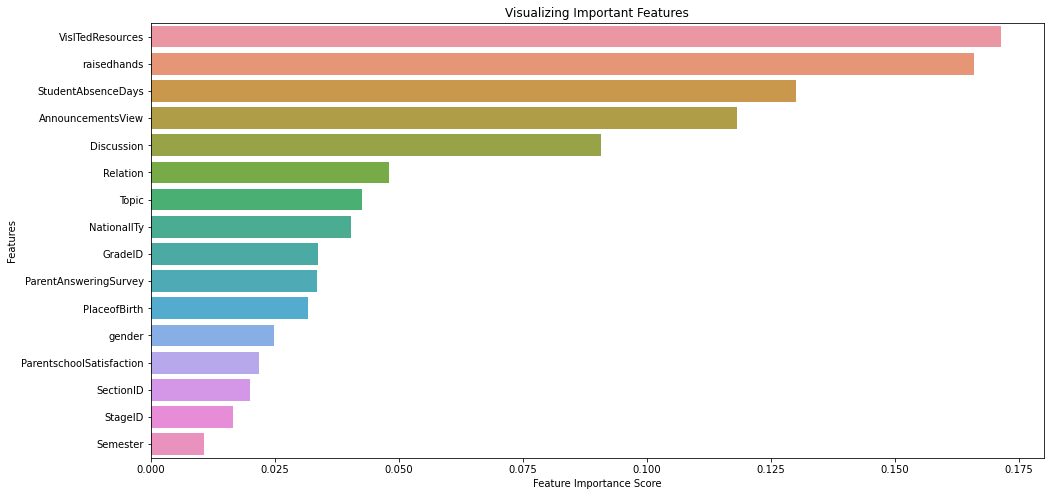

In [29]:
visualiza_features_importances(feature_imp)

Selecionando apenas as features com importancia acima de um determinado score

In [34]:
features_selecionadas = []
for feature,importancia in feature_imp.iteritems():
    if importancia > 0.03:
        print('{}: \t{}'.format(feature, importancia))
        features_selecionadas.append(feature)

VisITedResources: 	0.17143606269016073
raisedhands: 	0.16598990664674526
StudentAbsenceDays: 	0.13002768001697473
AnnouncementsView: 	0.11828040198870687
Discussion: 	0.09067650826745349
Relation: 	0.04799239308471797
Topic: 	0.04251435589486981
NationalITy: 	0.04027818876344031
GradeID: 	0.03369585045558495
ParentAnsweringSurvey: 	0.033427369484345056
PlaceofBirth: 	0.03167564902177484


Separando os dados em treino e teste utilizando apenas as features selecionadas

In [37]:
x_train, x_test, y_train, y_test = train_test_split(df_edu[features_selecionadas],
                                                    df_edu['Class'],
                                                    test_size=0.3,
                                                    random_state=0
                                                    )

Verificando a nova forma dos dados

In [38]:
x_train.shape, x_test.shape

((336, 11), (144, 11))

In [39]:
y_train.shape, y_test.shape

((336,), (144,))

Instanciando o objeto classificador

In [40]:
random_clf = RandomForestClassifier(random_state=0)

Treinando novamente o modelo Random Forest

In [41]:
random_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

Executando o algoritmo de arvores de decisão com o conjunto de teste

In [43]:
resultado = random_clf.predict(x_test)
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1,
       0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0])

Metricas de validação

In [44]:
from sklearn import metrics
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74        39
           1       0.80      0.94      0.86        34
           2       0.80      0.79      0.79        71

    accuracy                           0.80       144
   macro avg       0.80      0.81      0.80       144
weighted avg       0.80      0.80      0.80       144



### **Explorando as árvores da Floresta gerada**

In [45]:
print('Número de árvores da floresta: {}'.format(len(random_clf.estimators_)))
print('Árvores floresta gerada:')
for tree in random_clf.estimators_:
    print('\nNumero de nós: {}'.format(tree.tree_.node_count))
    print('Profundidade de árvore: {}'.format(tree.tree_.max_depth))
    print('Features importantes: {}'.format(tree.feature_importances_))
    print('\nObjeto: {}'.format(tree))

Número de árvores da floresta: 100
Árvores floresta gerada:

Numero de nós: 125
Profundidade de árvore: 13
Features importantes: [0.19961893 0.10076498 0.24943917 0.09382733 0.094918   0.03292224
 0.04313163 0.04893472 0.04948784 0.07230778 0.01464739]

Objeto: DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

Numero de nós: 135
Profundidade de árvore: 11
Features importantes: [0.09050287 0.20291479 0.24457129 0.12403918 0.05514177 0.04527278
 0.04818703 0.0077163  0.03861323 0.10337816 0.0396626 ]

Objeto: DecisionTreeClassifier(max_features='sqrt', random_state=398764591)

Numero de nós: 135
Profundidade de árvore: 12
Features importantes: [0.13994086 0.20133865 0.14202236 0.1878588  0.0837213  0.08162966
 0.0309756  0.03351242 0.02600674 0.07299361 0.        ]

Objeto: DecisionTreeClassifier(max_features='sqrt', random_state=924231285)

Numero de nós: 163
Profundidade de árvore: 14
Features importantes: [0.22985612 0.07293418 0.16953514 0.18084455 0.07767585 0.109

In [51]:
random_clf.decision_path

<bound method BaseForest.decision_path of RandomForestClassifier(random_state=0)>

**Selecionando uma árvore da floresta**

In [57]:
tree0 = random_clf.estimators_[0]

In [58]:
tree0

DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

Visualizando de forma gráfica

In [59]:
from sklearn.tree import export_graphviz
import graphviz

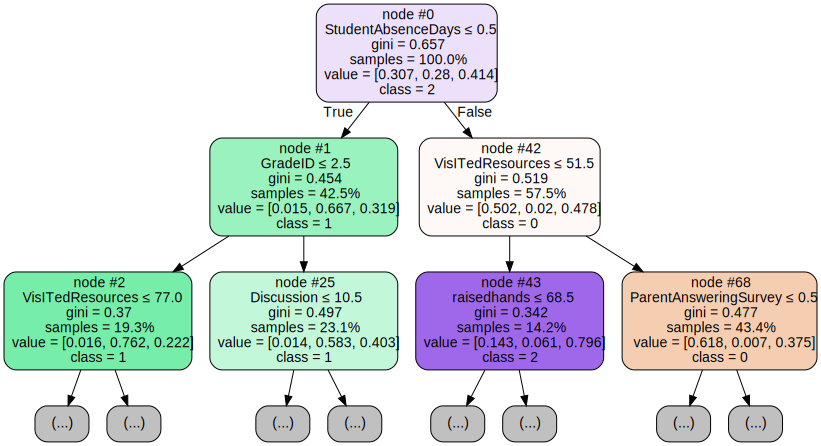

In [53]:
dot_data = export_graphviz(tree0,
                          max_depth=2,
                          out_file=None,
                          feature_names=x_train.columns,
                          class_names=['0','1','2'],
                          filled=True,
                          rounded=True,
                          proportion=True,
                          node_ids=True,
                          rotate=False,
                          label='all',
                          special_characters=True
                          )

graph = graphviz.Source(dot_data)
graph

Selecionando outra árvore

In [55]:
tree25 = random_clf.estimators_[25]

In [60]:
tree25

DecisionTreeClassifier(max_features='sqrt', random_state=1686997841)

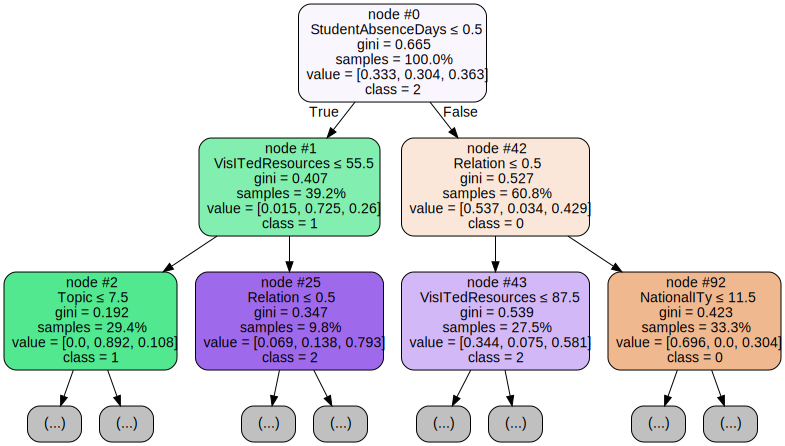

In [61]:
dot_data = export_graphviz(tree25,
                          max_depth=2,
                          out_file=None,
                          feature_names=x_train.columns,
                          class_names=['0','1','2'],
                          filled=True,
                          rounded=True,
                          proportion=True,
                          node_ids=True,
                          rotate=False,
                          label='all',
                          special_characters=True
                          )

graph = graphviz.Source(dot_data)
graph